In [1]:
import numpy as np # linear algebra
%matplotlib inline
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
sns.set(style="white", context="talk")
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
train = pd.read_json('train_gold.json', lines=True)
categories = pd.read_json('categories.json', lines=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train.head()

,idx,text,reply,categories,mp4
0,0,we can all agree that any song by Niall Horan.,oui oui,[yes],6dc39e96b11275f064fdaed88273b45e.mp4
1,1,Will you be installing #ScottyFromMarketing's ...,,[no],cfff051f05d8d3b7136c7d58ea6ad55f.mp4
2,2,Growing up my mum would call me a Nigga despit...,And he joins in??? Pour some hot grits on em,[smh],bf39e7bd9ad24354ce3ba6822b0104af.mp4
3,3,Rest your head on my chest when the world feel...,😂😂😂😂😂,[wink],173a707a04c277354a2f23cf01d6151e.mp4
4,4,Imagine Will Hernandez and Wills both doing a ...,,[yes],aab6d6bfb0c1382269ddba9b71cc8b7a.mp4


In [0]:
l = train['categories'].values.tolist()

In [0]:
def flatmatrix(matrix):
    result = []
    for i in range(len(matrix)):
        result.extend(matrix[i])
    return result

## 各類標籤的數量排序

In [5]:
cat_list = flatmatrix(l)
from collections import Counter
c = Counter(cat_list).most_common(43)
c

[('applause', 3442),
 ('hug', 3239),
 ('agree', 2987),
 ('yes', 2719),
 ('no', 2185),
 ('seriously', 2012),
 ('facepalm', 2001),
 ('smh', 1881),
 ('sigh', 1768),
 ('shocked', 1704),
 ('omg', 1551),
 ('slow_clap', 1343),
 ('eye_roll', 1221),
 ('idk', 1085),
 ('awww', 977),
 ('dance', 912),
 ('eww', 910),
 ('oh_snap', 904),
 ('ok', 878),
 ('shrug', 873),
 ('thank_you', 860),
 ('scared', 829),
 ('you_got_this', 827),
 ('oops', 816),
 ('happy_dance', 810),
 ('good_luck', 710),
 ('thumbs_up', 692),
 ('please', 616),
 ('popcorn', 583),
 ('wink', 574),
 ('high_five', 535),
 ('win', 474),
 ('yawn', 461),
 ('deal_with_it', 429),
 ('hearts', 339),
 ('sorry', 336),
 ('do_not_want', 327),
 ('fist_bump', 292),
 ('want', 283),
 ('thumbs_down', 220),
 ('yolo', 197),
 ('kiss', 193),
 ('mic_drop', 170)]

## 各類前十高頻率的字

In [6]:
arr = []
category = categories.values.tolist()
category = flatmatrix(category)
for choose_word in category:
    res = []
    for i in range(len(train.categories)):
        if choose_word in train.categories[i]:
            res.append(train.text[i])
    tokenizer = TweetTokenizer()
    tok_text = []
    for i in range(len(res)):
        tmp = tokenizer.tokenize(res[i].lower().replace('’', '').replace('...', '').replace('“', '').replace('”', ''))
        tok_text.append(tmp)

    clear_token = []
    for doc in tok_text:
        docu = []
        for word in doc:
            if word not in stopwords and word not in string.punctuation:
                docu.append(word)
        clear_token.append(docu)


    freq = Counter()
    for i in range(len(clear_token)):
        freq.update(clear_token[i])

    arr.append([choose_word, freq.most_common(10)])
df = pd.DataFrame(arr, columns = ['category', 'most_common word'])
df

,category,most_common word
0,agree,"[(people, 253), (like, 244), (im, 200), (dont,..."
1,applause,"[(im, 371), (people, 295), (like, 289), (today..."
2,awww,"[(love, 105), (️, 88), (like, 85), (im, 84), (..."
3,dance,"[(️, 74), (one, 67), (good, 65), (.., 62), (im..."
4,deal_with_it,"[(people, 49), (like, 39), (im, 38), (trump, 2..."
5,do_not_want,"[(gif, 57), (new, 41), (please, 31), (form, 31..."
6,eww,"[(gif, 86), (like, 74), (best, 67), (im, 60), ..."
7,eye_roll,"[(one, 148), (people, 133), (day, 116), (gif, ..."
8,facepalm,"[(people, 205), (trump, 187), (get, 141), (lik..."
9,fist_bump,"[(im, 27), (like, 27), (time, 22), (follow, 21..."


## 各類前十高頻率的bigram

In [19]:
from itertools import islice
def count_ngrams(iterable,n=2):
    return Counter(zip(*[islice(iterable,i,None) for i in range(n)]))
arr = []   
for choose_word in category:
    res = []
    for i in range(len(train.categories)):
        if choose_word in train.categories[i]:
            res.append(train.text[i])
    tokenizer = TweetTokenizer()
    tok_text = []
    for i in range(len(res)):
        tmp = tokenizer.tokenize(res[i].lower().replace('’', '').replace('...', '').replace('“', '').replace('”', ''))
        tok_text += tmp
    
    # removing punctuation
    clear_token = []
    for p in tok_text:
        if p not in string.punctuation:
            clear_token.append(p)

    freq = count_ngrams(clear_token, 2)

    arr.append([choose_word, freq.most_common(10)])
df2 = pd.DataFrame(arr, columns = ['category', 'most_common bigram'])
df2

,category,most_common bigram
0,agree,"[((in, the), 132), ((of, the), 132), ((to, be)..."
1,applause,"[((in, the), 199), ((of, the), 168), ((you, ar..."
2,awww,"[((i, love), 47), ((❤, ️), 40), ((in, the), 40..."
3,dance,"[((for, a), 47), ((hi, guys), 39), ((see, you)..."
4,deal_with_it,"[((in, the), 24), ((to, the), 17), ((it, is), ..."
5,do_not_want,"[((a, gif), 41), ((in, the), 38), ((of, a), 32..."
6,eww,"[((a, gif), 67), ((in, the), 66), ((choose, a)..."
7,eye_roll,"[((tell, me), 99), ((in, the), 98), ((when, yo..."
8,facepalm,"[((in, the), 145), ((i, have), 102), ((for, th..."
9,fist_bump,"[((if, you), 17), ((for, the), 16), ((in, the)..."


## 文字雲生成

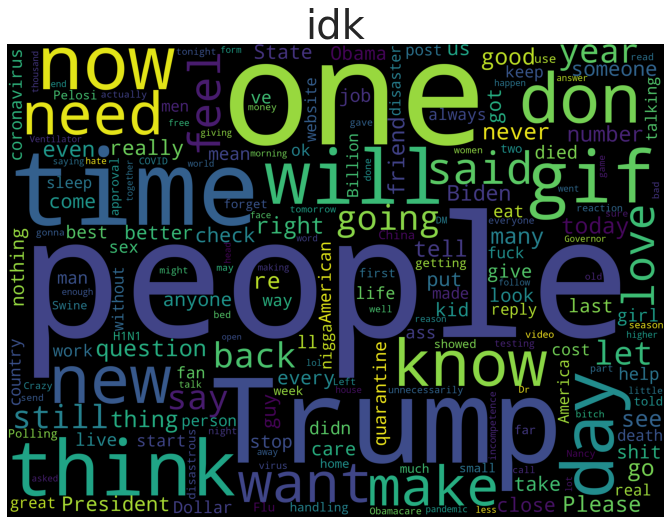

In [8]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(40,25))

choose_word = 'idk'

res = []
for i in range(len(train.categories)):
    if choose_word in train.categories[i]:
        res.append(train.text[i])

cloud_word = WordCloud(

stopwords=STOPWORDS,

background_color='black',

collocations=False,

width=2500,

height=1800

).generate(" ".join(res))

plt.subplot(2, 3, 1)

plt.axis('off')

plt.title(choose_word, fontsize=40)

plt.imshow(cloud_word)

## One hot encoding

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
ohtrain = pd.DataFrame(mlb.fit_transform(train['categories']),columns=mlb.classes_)
ohtrain

,agree,applause,awww,dance,deal_with_it,do_not_want,eww,eye_roll,facepalm,fist_bump,good_luck,happy_dance,hearts,high_five,hug,idk,kiss,mic_drop,no,oh_snap,ok,omg,oops,please,popcorn,scared,seriously,shocked,shrug,sigh,slow_clap,smh,sorry,thank_you,thumbs_down,thumbs_up,want,win,wink,yawn,yes,yolo,you_got_this
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31998,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Correlation heat map

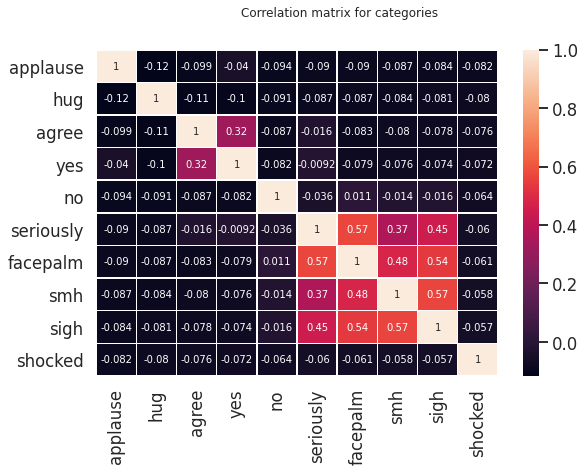

In [10]:
tmp = ['applause', 'hug', 'agree', 'yes', 'no', 'seriously', 'facepalm', 'smh', 'sigh', 'shocked']
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle('Correlation matrix for categories')
sns.heatmap(ohtrain[tmp].corr(), annot=True, linewidths=.5, ax=ax)

In [0]:
ohtrain['total_length'] = train['text'].str.len()
ohtrain['new_line'] = train['text'].str.count('\n'* 1)
ohtrain['new_small_space'] = train['text'].str.count('\n'* 2)
ohtrain['uppercase_words'] = train['text'].apply(lambda l: sum(map(str.isupper, list(l))))
ohtrain['question_mark'] = train['text'].str.count('\?')
ohtrain['exclamation_mark'] = train['text'].str.count('!')

FEATURES = ['total_length', 
            'new_line', 
            'new_small_space', 
            'uppercase_words',
            'question_mark',
            'exclamation_mark']
tmp += FEATURES

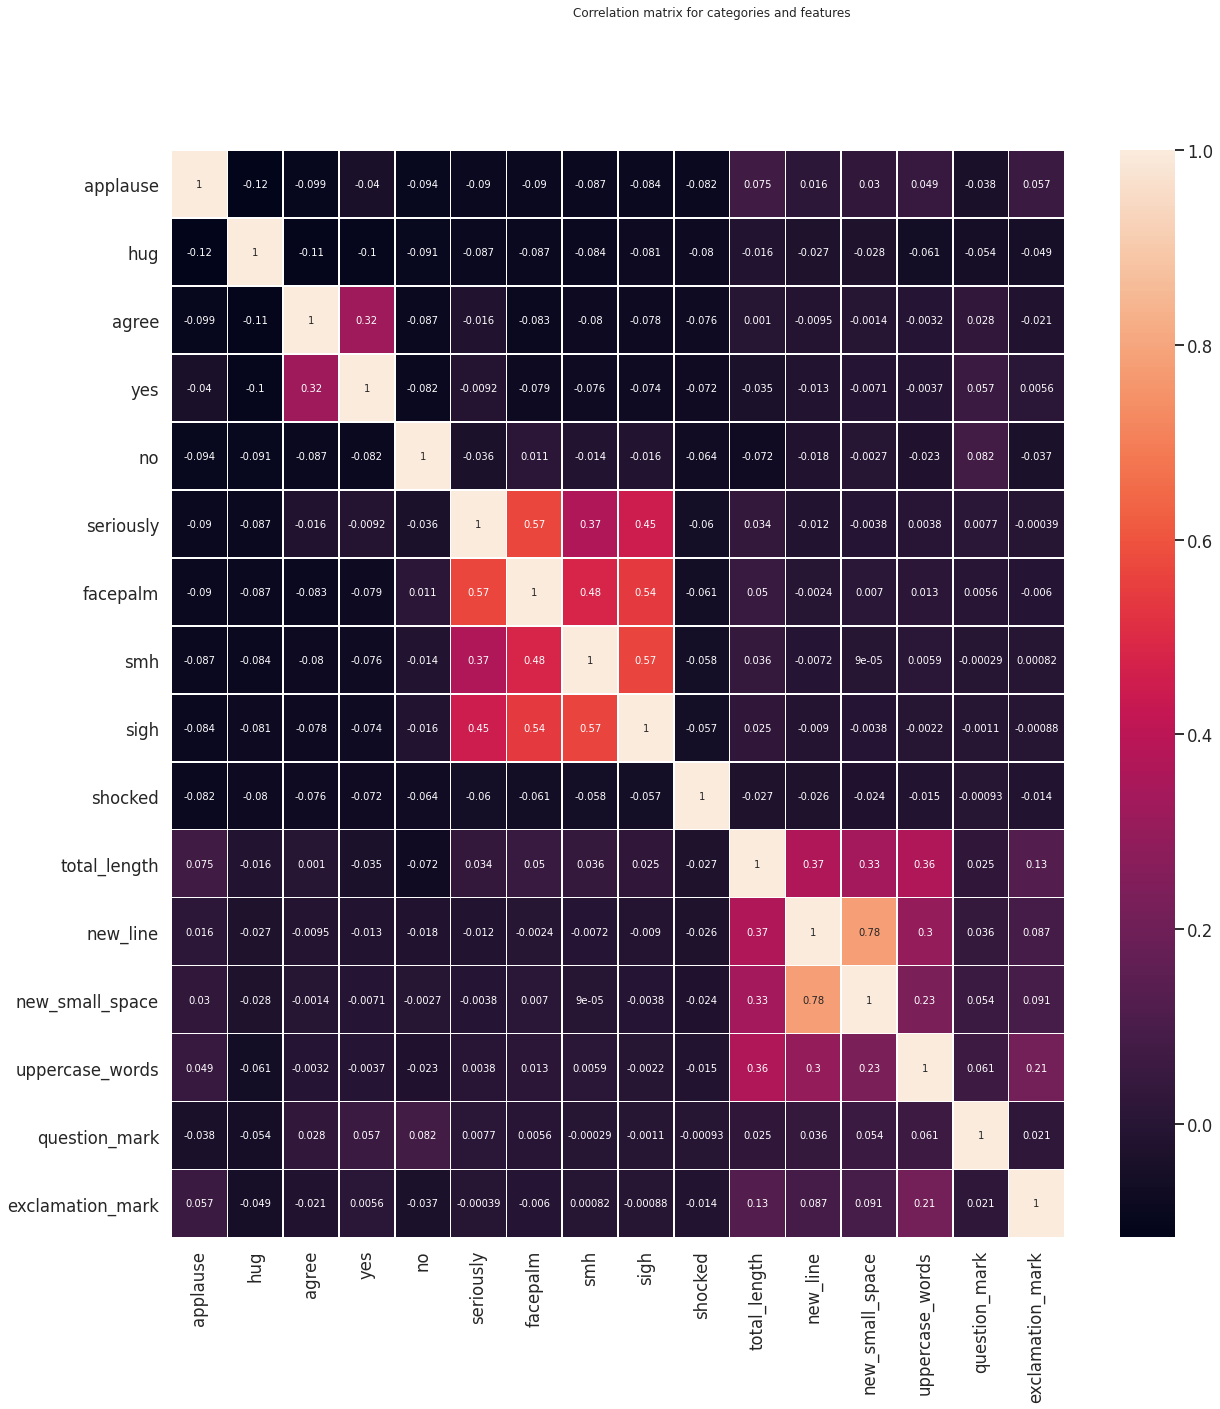

In [12]:
f, ax = plt.subplots(figsize=(20, 20))
f.suptitle('Correlation matrix for categories and features')
sns.heatmap(ohtrain[tmp].corr(), annot=True, linewidths=.5, ax=ax)

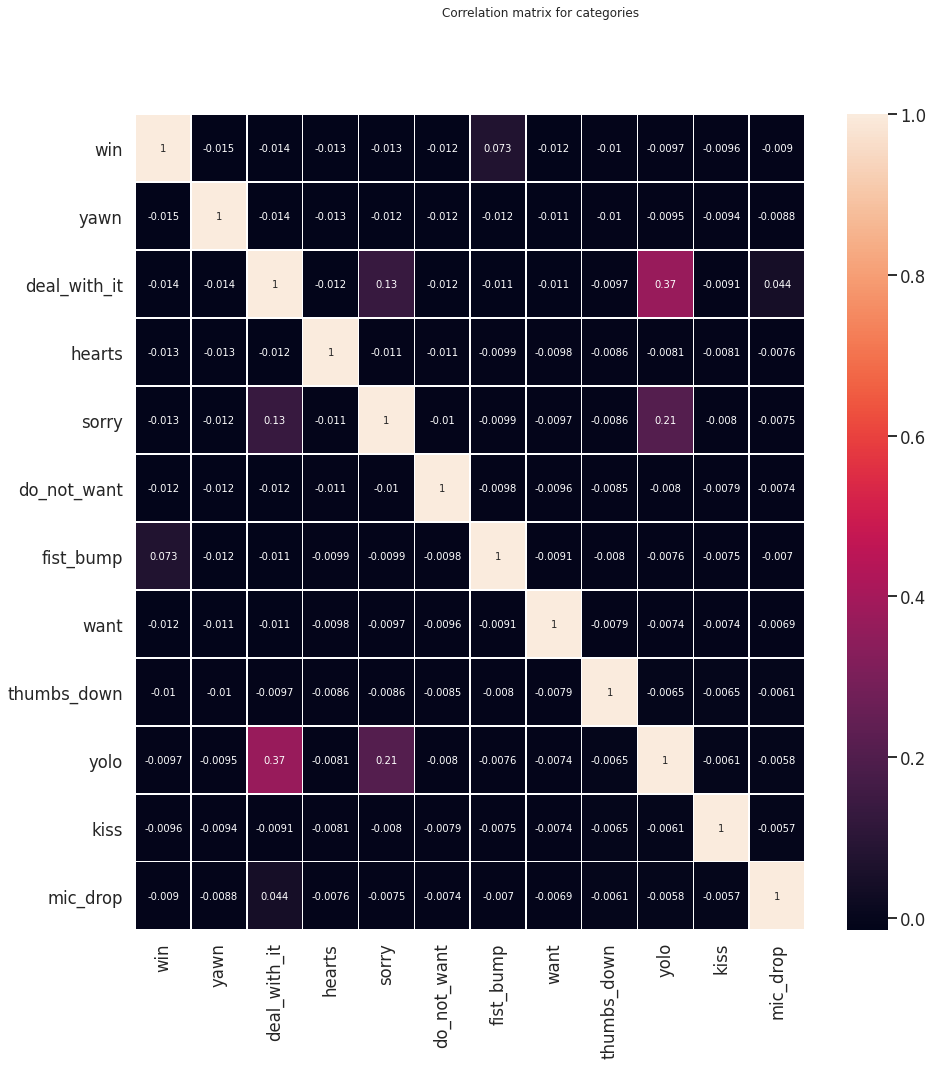

In [21]:
tmp2 = []
for i in range(31, 43):
    tmp2.append(c[i][0])
f, ax = plt.subplots(figsize=(15, 15))
f.suptitle('Correlation matrix for categories')
tmp2
sns.heatmap(ohtrain[tmp2].corr(), annot=True, linewidths=.5, ax=ax)

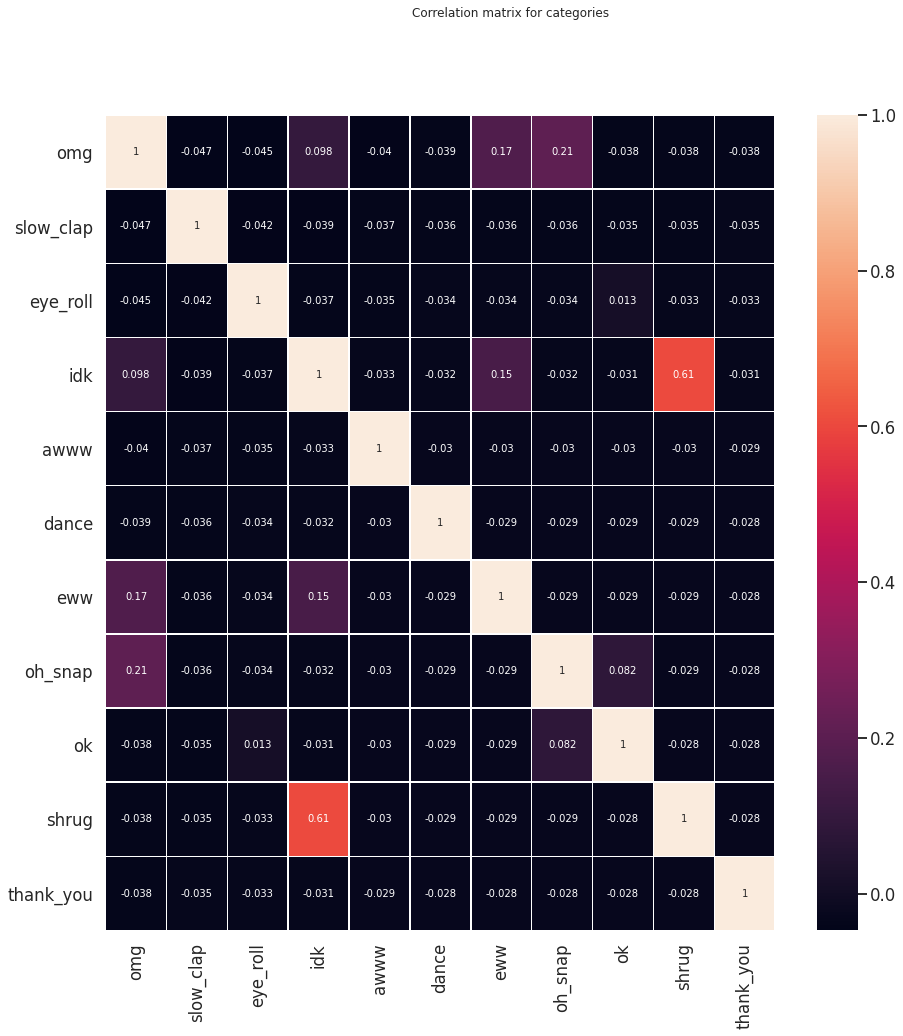

In [20]:
tmp3 = []
for i in range(10, 21):
    tmp3.append(c[i][0])
f, ax = plt.subplots(figsize=(15, 15))
f.suptitle('Correlation matrix for categories')
tmp3
sns.heatmap(ohtrain[tmp3].corr(), annot=True, linewidths=.5, ax=ax)

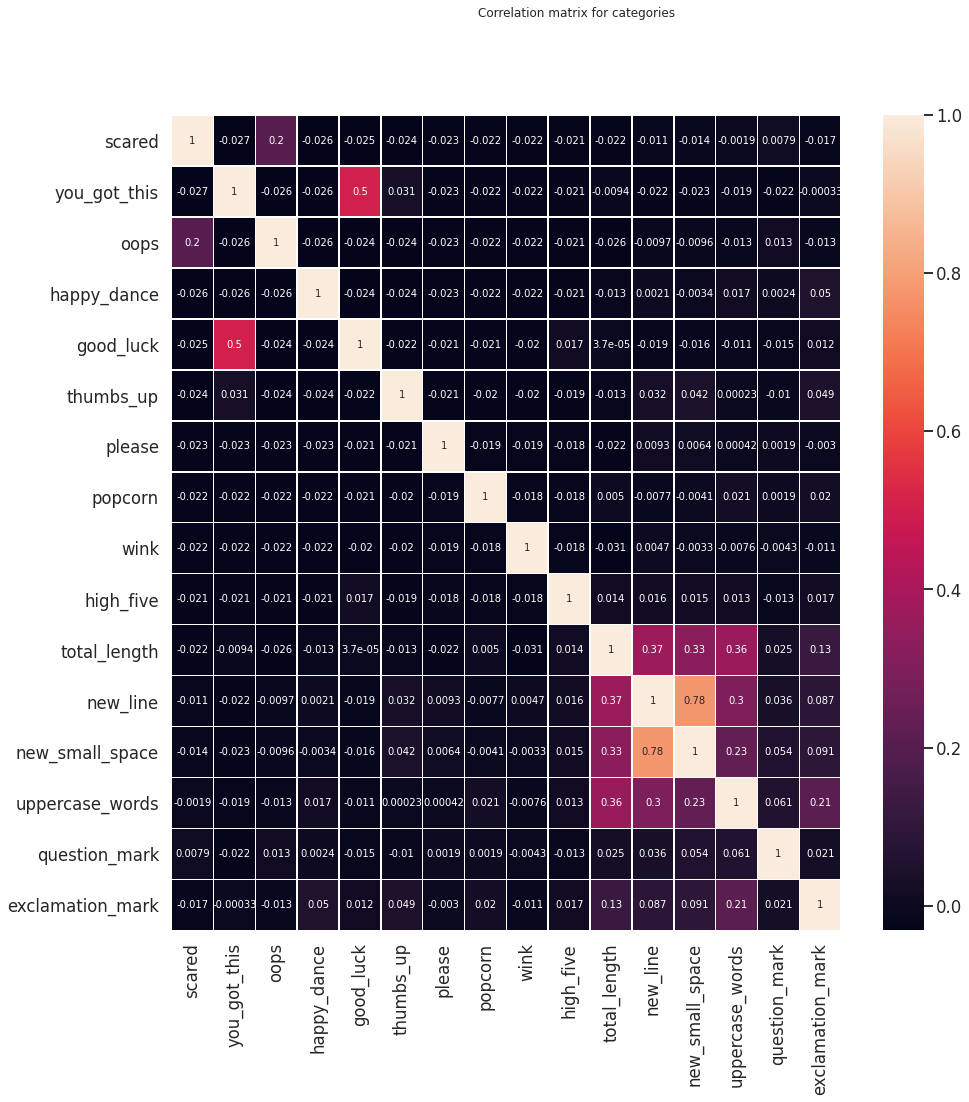

In [15]:
tmp4 = []
for i in range(21, 31):
    tmp4.append(c[i][0])
f, ax = plt.subplots(figsize=(15, 15))
f.suptitle('Correlation matrix for categories')
tmp4 += FEATURES
sns.heatmap(ohtrain[tmp4].corr(), annot=True, linewidths=.5, ax=ax)

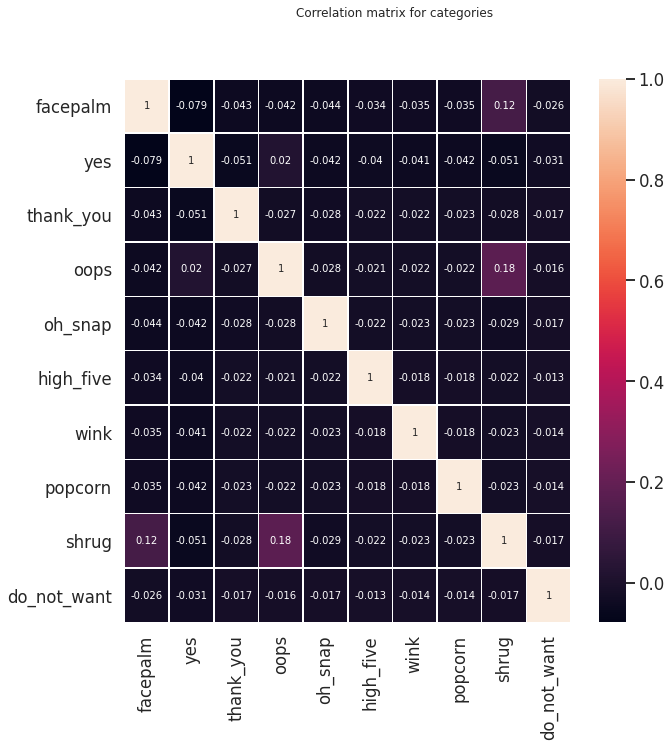

In [16]:
import random
tmp5 = random.sample(category, 10)
f, ax = plt.subplots(figsize=(10, 10))
f.suptitle('Correlation matrix for categories')
sns.heatmap(ohtrain[tmp5].corr(), annot=True, linewidths=.5, ax=ax)